# Exploration des données concernant le café

In [1]:
import pandas as pd
from datetime import *
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


%matplotlib inline

In [2]:
# Read the CSV file (utf-8 encoded)
df = pd.read_csv('./data/DataRisaralda_v2_utf-8.csv', header=0, sep=',', index_col=0, parse_dates=False, encoding='utf-8')

Tableaux de colonnes, utile pour grouper

In [3]:
cols = ['Malla 17-18','Malla 14-16','Malla <13','Negros y vinagres','Broca','Broca de punto','Veteado','Mordido',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo','Conchas',
         'Partido','Ambar','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total',
         'prec1','prec2','prec3','prec4','prec5','prec6','prec7','prec8','prec9','prec10','tmin1','tmin2','tmin3','tmin4','tmin5',
         'tmin6','tmin7','tmin8','tmin9','tmin10','tmax1','tmax2','tmax3','tmax4','tmax5','tmax6','tmax7','tmax8','tmax9','tmax10',
         'tmean1','tmean2','tmean3','tmean4','tmean5','tmean6','tmean7','tmean8','tmean9','tmean10','dtr1','dtr2','dtr3','dtr4',
         'dtr5','dtr6','dtr7','dtr8','dtr9','dtr10']

# Information sur les scores des tasses par année

In [4]:
PuntajeTotal_groupby_year = df['Puntaje Total'].groupby(df['year'])

PuntajeTotal_groupby_year.describe()

year       
2011  count    351.000000
      mean      65.525997
      std       30.520292
      min        0.000000
      25%       75.625000
      50%       79.000000
      75%       82.000000
      max       85.500000
2016  count    416.000000
      mean      78.170000
      std       11.596058
      min        0.000000
      25%       77.437500
      50%       81.625000
      75%       84.000000
      max       87.750000
Name: Puntaje Total, dtype: float64

## Répartition du total de points pour les années 2011 et 2016

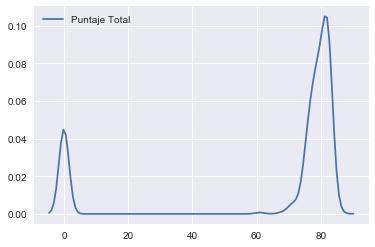

In [5]:
foo = df.ix[(df['year']==2011) ]

sns.kdeplot(foo['Puntaje Total'])

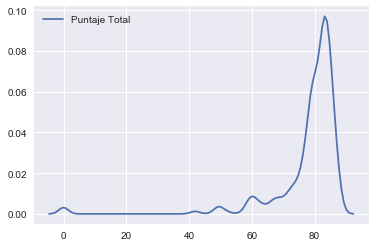

In [6]:
foo = df.ix[(df['year']==2016) ]

sns.kdeplot(foo['Puntaje Total'])

# Analyse de l'occurence des cafés

Combien de fois un café revient-il entre les années ?

L'élimination des doublons s'est faite sur le numéro SICA et la date de test.

In [62]:
# Certains cafés on été testés plusieurs fois, parfois même 2 fois dans la même année mais à plusieurs mois d'intervale. 

dOccurences = df['SICA 1'].value_counts().to_dict() #.to_frame(name='Occurence')

dfOccurences = pd.DataFrame.from_dict(dOccurences, orient='index')

# Ajout d'une colonne contenant le nombre d'occurence

df['occurence'] = 0

# Fonctionne pas dans datacleaning...?
df['SICA 1'] = df['SICA 1'].astype(str)


for index, row in df.iterrows():
    df.set_value(index, 'occurence', dOccurences.get(str(row['SICA 1'])))

#print df['occurence']

print df['occurence'].value_counts()




1    631
2    118
3     18
Name: occurence, dtype: int64


In [71]:
df_1 = df[df['occurence'] == 2]

fields = ['SICA 1','Fecha Analysis','year']
df_1[fields].sort_values(['SICA 1'])

,SICA 1,Fecha Analysis,year
103,6604500399,2011-12-15 00:00:00,2011
575,6604500399,2016-07-22 00:00:00,2016
622,6604502299,2016-08-01 00:00:00,2016
113,6604502299,2011-12-16 00:00:00,2011
569,6604502461,2016-07-22 00:00:00,2016
566,6604502461,2016-07-17 00:00:00,2016
122,6608800176,2011-11-16 00:00:00,2011
366,6608800176,2016-07-24 00:00:00,2016
391,6608800780,2016-07-22 00:00:00,2016
368,6608800780,2016-05-24 00:00:00,2016


# Comptage du nombre de cafés avec plus de 80 points (specialty coffee)

In [9]:
print df[(df['Puntaje Total']>=80)].shape
print df[(df['Puntaje Total']<80)].shape

(402, 142)
(365, 142)


Sur la totalité des cafés, toutes années confondues, nous avons plus de la moitié qui peut être considéré comme "Specialty coffee" du fait que le nombre de points obtenus sur 100 est supérieur à 80. 



In [102]:
# On enlève Mordido, conchas et ambar et les Malla -> pas présent partout
coffee = ['Negros y vinagres','Broca','Broca de punto','Veteado',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
         'Partido','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total','year']
coffee1 = ['Negros y vinagres','Broca','Broca de punto','Veteado',
         'Inmaduro','Flojo','Sobresecado','Arrugado','Aplastado','Cristalizado','Reposado','Granizo',
         'Partido','Defectos totales','Humedad (%)','Merma (%)','Aroma-Fragancia',
         'Acidez','Cuerpo','Sabor',
         'Sabor residual','Dulzor','Uniformidad','Balance','Taza limpia','Puntaje catador','Puntaje Total']

In [82]:
print df.shape

(767, 142)


# Analyse de la PCA

la PCA est réalisée sans l'année

(767, 28)


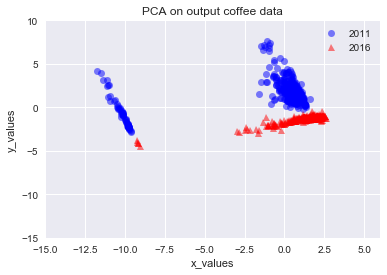

In [132]:
# Some coffee have missing datas in the notation (points) (they are bad)
dftmp = df[coffee].dropna(axis=1, how='any')
print dftmp.shape

mat = np.array(dftmp[coffee1])

#print numpy.isnan(mat).any()


#print np.argwhere(np.isnan(mat))
       
#print mat

mlab_pca = mlabPCA(mat)
last_index = mlab_pca.Y.shape[0]

start_newyear = 0
for index,row in dftmp.iterrows():
    if row['year'] == 2011:
        continue
    else:
        start_newyear = index
        break



#print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:start_newyear,0],mlab_pca.Y[0:start_newyear,1], 'o', markersize=7, color='blue', alpha=0.5, label=df['year'][2])
plt.plot(mlab_pca.Y[start_newyear:last_index,0], mlab_pca.Y[start_newyear:last_index,1], '^', markersize=7, color='red', alpha=0.5, label=df['year'][490])

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-15,6])
plt.ylim([-15,10])
plt.legend()
plt.title('PCA on output coffee data')

plt.show()

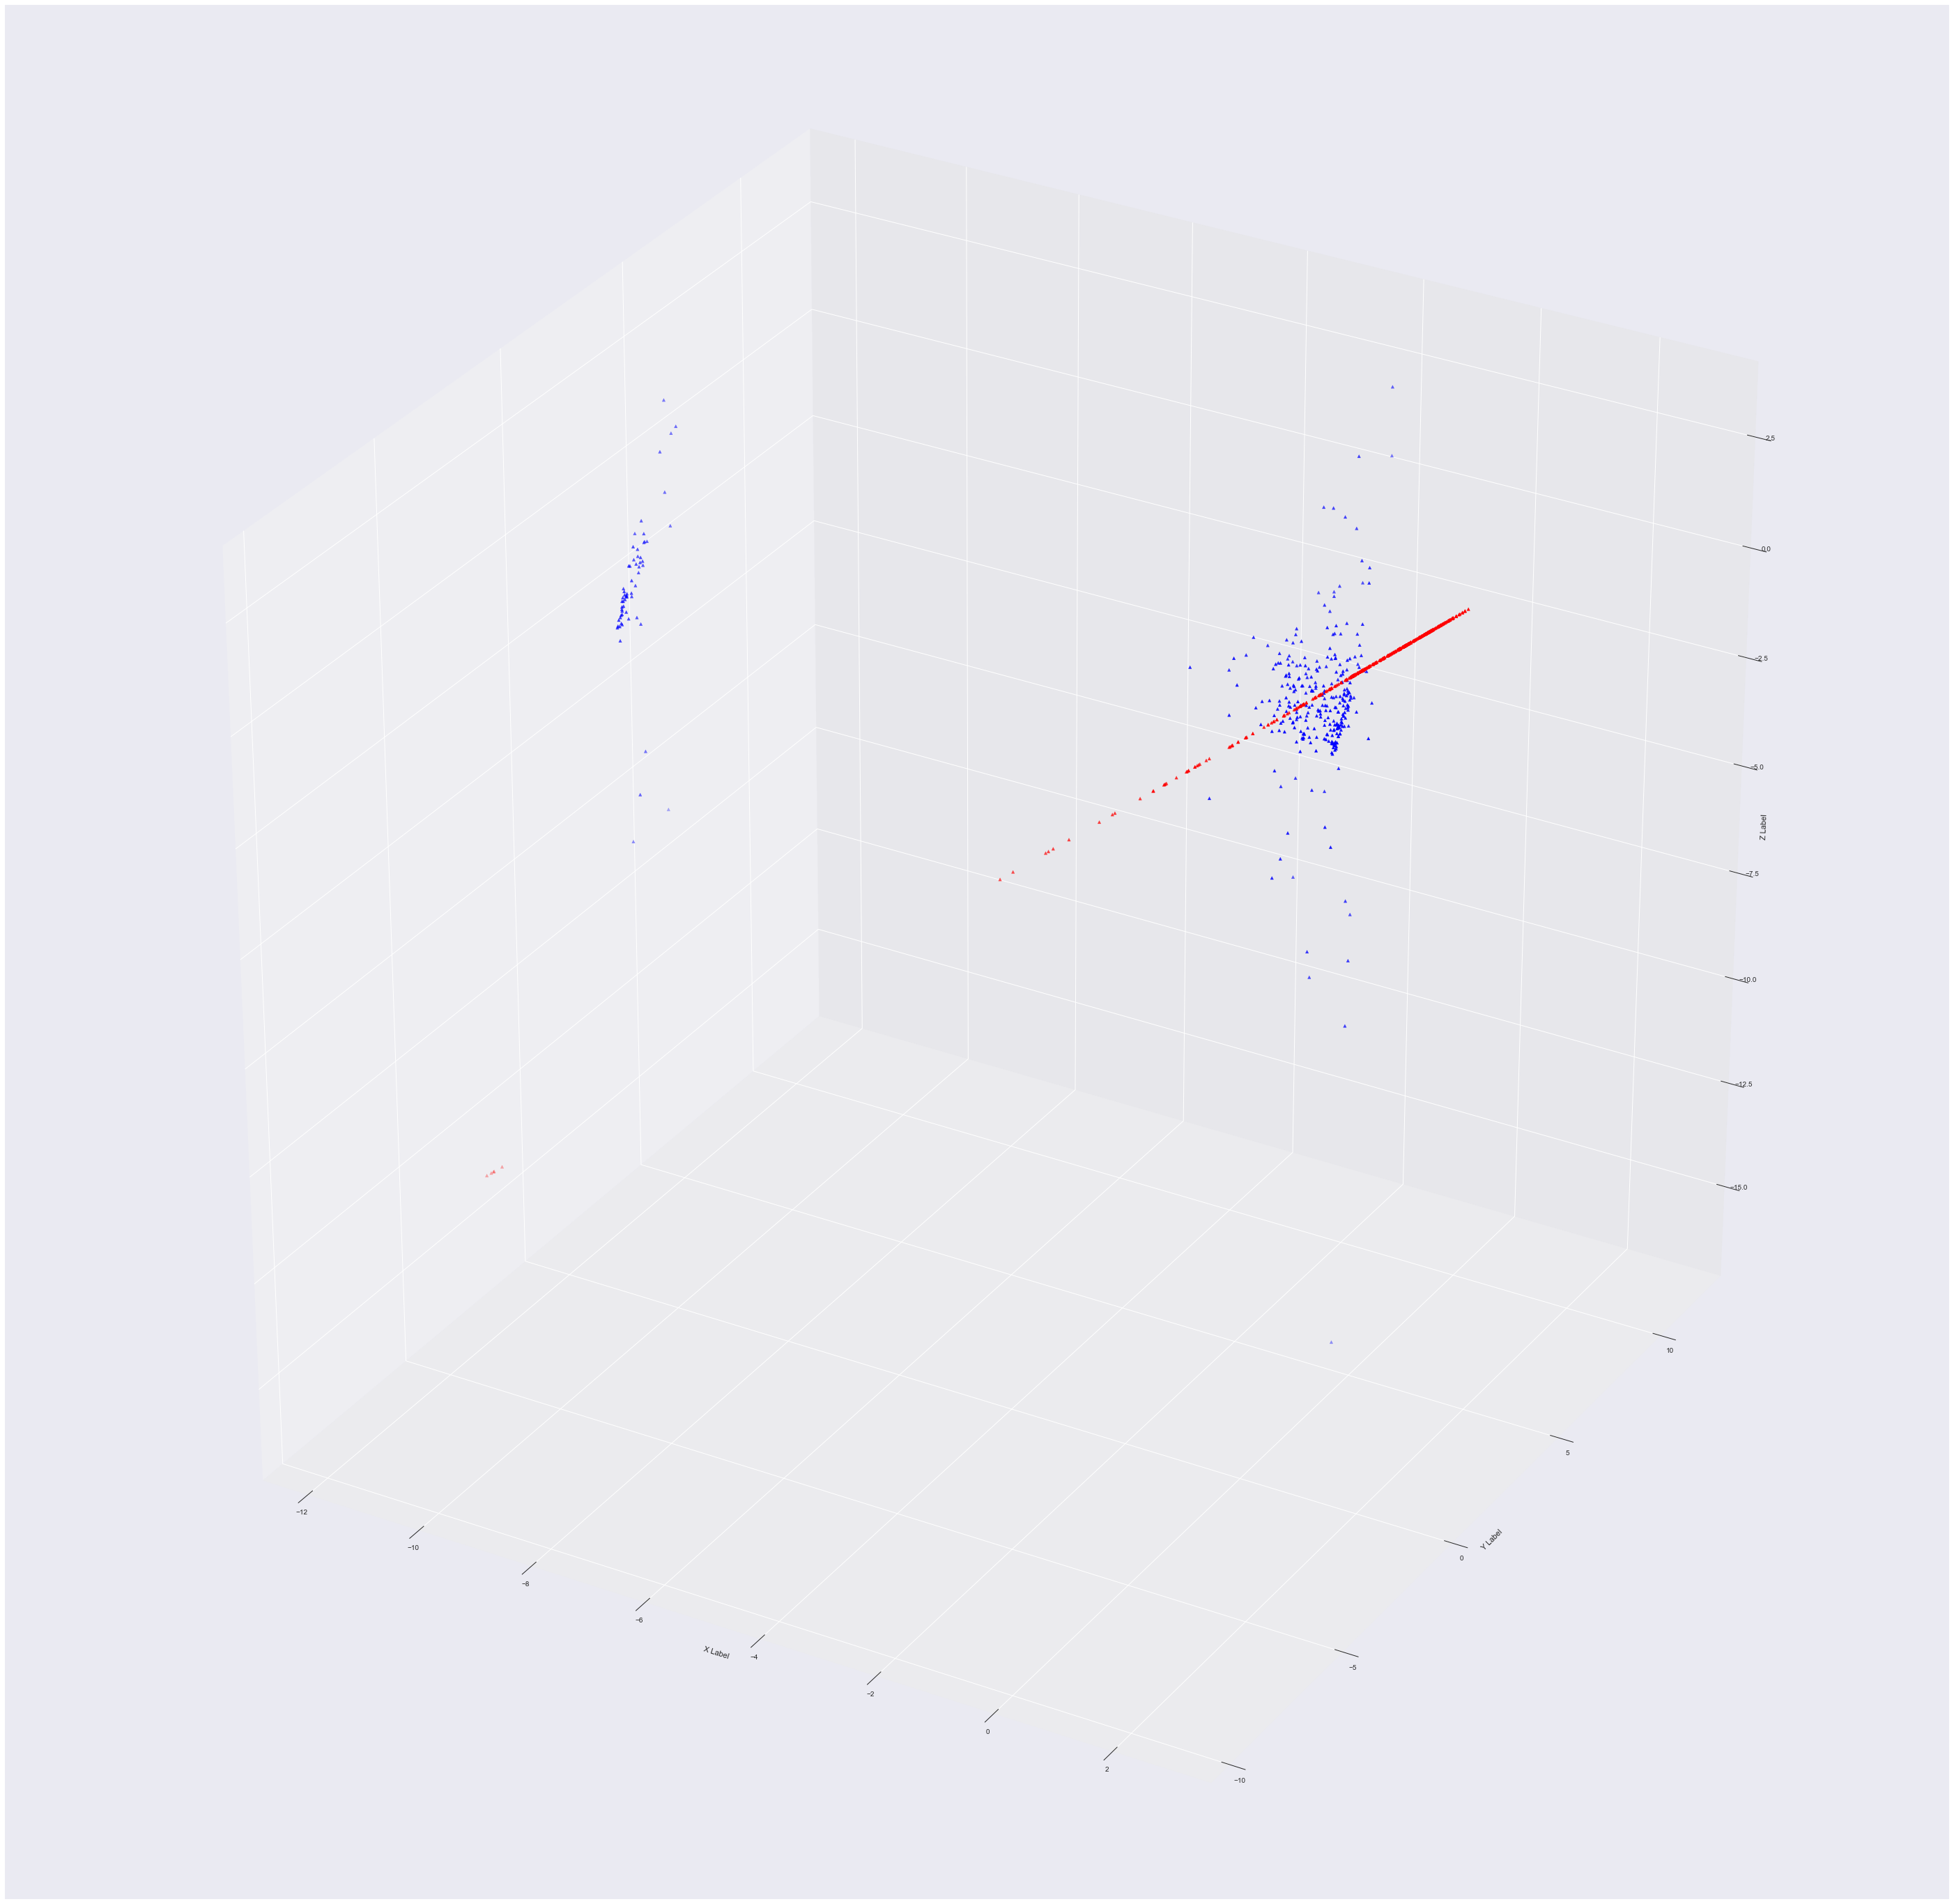

In [138]:
'''import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(dftmp)

pca.components_

sns.jointplot(pca.components_[0],pca.components_[1])
'''


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs = mlab_pca.Y[0:start_newyear,0]
ys = mlab_pca.Y[0:start_newyear,1]
zs = mlab_pca.Y[0:start_newyear,2]

ax.scatter(xs, ys, zs, c=c, marker=m)

xs = mlab_pca.Y[start_newyear:last_index,0]
ys = mlab_pca.Y[start_newyear:last_index,0]
zs = mlab_pca.Y[start_newyear:last_index,0]

ax.scatter(xs, ys, zs, c='red', marker=m)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()



# Autres graphiques

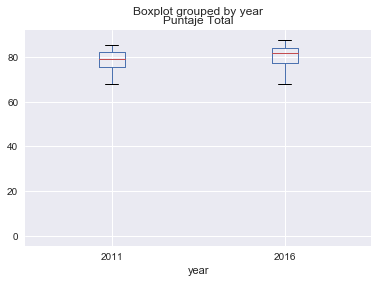

In [12]:
df.boxplot('Puntaje Total', 'year')

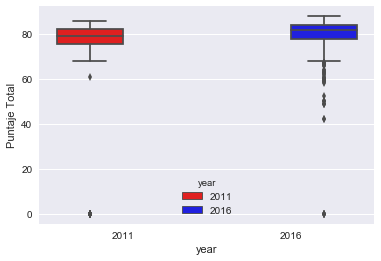

In [13]:
ax = sns.boxplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['red','blue','green'], orient='v')



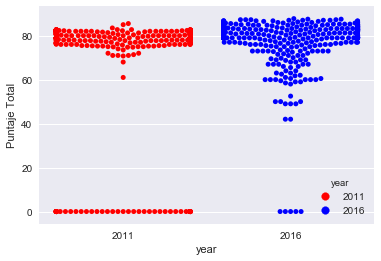

In [14]:
bx = sns.swarmplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['red','blue','green'], orient='v')


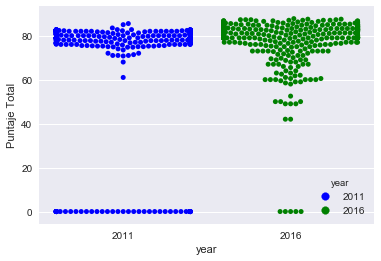

In [15]:
bx = sns.swarmplot(x="year", hue="year", y="Puntaje Total", data=df, palette=['blue','green'], orient='v')

# Observations

On peut aisément voir que l'année 2016 compte beaucoup moins de cafés de mauvaise qualité ayant échoué totalement (0 points). 

# Subset des cafés revenant sur plusieurs années

In [16]:
k1 = df.loc[(df['SICA 1'].count() == 2)]

KeyError: False